In [3]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats, optimize
import os
# import atpy
def nice_string_output(d, extra_spacing=5, decimals=3):
    """ 
    Takes a dictionary d consisting of names and values to be properly formatted.
    Makes sure that the distance between the names and the values in the printed
    output has a minimum distance of 'extra_spacing'. One can change the number
    of decimals using the 'decimals' keyword.  
    """
    
    names = d.keys()
    max_names = len_of_longest_string(names)
    
    values = values_to_string(d.values(), decimals=decimals)
    max_values = len_of_longest_string(values)
    
    string = ""
    for name, value in zip(names, values):
        spacing = extra_spacing + max_values + max_names - len(name) - 1 
        string += "{name:s} {value:>{spacing}} \n".format(name=name, value=value, spacing=spacing)
    return string[:-2]

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck15

# dist1 = Distance(unit=u.pc, z = z1, cosmology = Planck15)

Random Line

In [29]:
def lin(x, k, a):
    return k*x+a

In [30]:
x1=np.random.uniform(-10,10, 100)
k, a = np.random.uniform(0,10), np.random.uniform(-5,5) 
y1=lin(x1, k, a)

In [31]:
val, cov=optimize.curve_fit(lin, x1, y1)

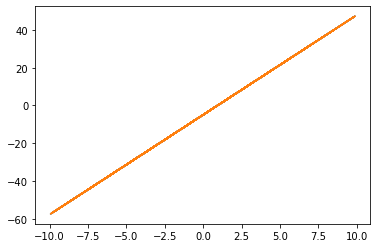

In [33]:
val, k,a
plt.plot(x1,y1)
plt.plot(x1, lin(x1, k, a))

Line with errors

In [35]:
x2=x1+np.random.normal(0,np.std(x1), 100)
y2=y1+np.random.normal(0,np.std(y1), 100)

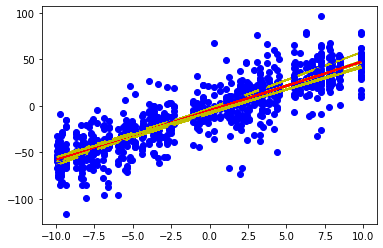

In [53]:
for i in range(0,len(x1),10):
    x2=x1+np.random.normal(0,i*np.std(x1)/len(x1), 100)
    y2=y1+np.random.normal(0,i*np.std(y1)/len(y1), 100)
#     y2=y1
    x2=x1
    val, cov=optimize.curve_fit(lin, x2, y2)
    plt.plot(x2,y2, 'bo')
    plt.plot(x1, lin(x1, k, a), 'r--')
    plt.plot(x2, lin(x2, val[0], val[1]), 'y--')
    val, k, a

Random function

In [96]:
#Arbitrary function
def rand(x,a,b,c):
    return a*np.exp(x*b)+c

array([0.99457982, 1.00291217, 1.00448133])

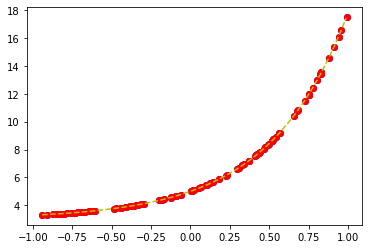

In [105]:
x=np.random.uniform(-1,1, 100)
yr=rand(x,2,2,3)
x3=x+np.random.normal(0,np.std(x)/len(x), 100)
y3=yr+np.random.normal(0,np.std(yr)/len(yr), 100)
val, cov=optimize.curve_fit(rand, x3, y3)
plt.plot(x,yr, 'bo')
x=np.sort(x)
x3=np.sort(x3)
plt.plot(x, rand(x, 2,2,3), 'ro')
plt.plot(x3, rand(x3, val[0], val[1], val[2]), 'y--')
val/np.array([2,2,3])